# Noise-induced Transitions. 
## Explorations of noise induced order (NIO) and noise-induced chaos (NIC) with last models.
### Correct use of arbitrary precision float operations implemented with 'BigFloat' julia object as a wraper for the corresponding MPFR C library

## All calculations below are performed with 1024 bits (aobut 256 decimal figures) of precision.


# 1a. Noise-Induced Chaos (NIC) using BigFloat with 1024 bits

In [ ]:
#using Pkg; Pkg.add("Plots"); Pkg.build("Plots"); using Plots #calling the libraries for making plots

In [1]:
using Plots

In [2]:
function NICvlmlBig(epsil::BigFloat,n::Int64,exponentk::Int64,prec::Int64)
setprecision(prec) # Sets number of bits used in representing BigFloats
iters = collect(1:n-1)
d = 2.0^(-exponentk)
@show d
x = Array{BigFloat,1}(undef,n)
eRND = Array{BigFloat,1}(undef,n)
preLE = Array{BigFloat,1}(undef,n-1)
x[1] = rand(BigFloat)
@show x[1]
absd = BigFloat(abs(d))
    for j in iters
    xbfj = BigFloat(x[j])
    zro = BigFloat(0.0)
    one1 = BigFloat(1.0)
    oneovertwo = BigFloat(1/2)
    eRND[j] = epsil*(2*rand(BigFloat)-1)
        if xbfj < zro
            x[j+1] = d*x[j] + d + eRND[j]
            preLE[j] = log(BigFloat(absd))
            elseif xbfj >= zro  && xbfj < oneovertwo
            x[j+1] = 2*(1-d)*x[j] + d + eRND[j]
            preLE[j] = log(2*(1-absd))
            elseif xbfj >= oneovertwo  && xbfj <= one1
            x[j+1] = 2*(1-d)*(1-x[j]) + d + eRND[j]
            preLE[j] = log(2*(1-absd))
            elseif xbfj > one1
            x[j+1] = d*(1-x[j]) + d + eRND[j]
            preLE[j] = log(absd)
            else
            println("Breakpoint reached due to bad conditioning")
        end
    #@show preLE[j]
    end
    @show x[n]
    @show length(preLE)
    @show length(x)
    @show preLE[n-1]
    #LyapExp = sum(preLE)/length(preLE)
    lag = 1000
    LyapExp = sum(preLE[n-lag:n-1])/length(preLE[n-lag:n-1])
    @show LyapExp
    #hist(x)
    return x
    #return preLE 
    #return LyapExp
end



NICvlmlBig (generic function with 1 method)

## Next, we evaluate the function NIC_vlmlBig() for different sets of parameters, compute the corresponding histograms and compare the outupts

## 1st  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0$; $d = 2^{-7}$ 

In [3]:
#PARAMETERS
epsilon= BigFloat(0.0)
iters = 100000
precision=1024
exponent=7
@time xorb1024_1e7_epsZero_= NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.8226254475666586314407495307227511289408067908972238433861592383122054124968929516871441015225176025673328518265468068158336459659418491944354018847136461111572270604667739700312585832990805699012555479085304438046926818250217901969692919641057591351500442729626617328615751785192623877900877683198972728676442
x[n] = 0.9667513461907877531403949590257026790474444989954429946372441320459864485206685842827531819594351254947479328575965399995868530037202386463523439651634612827800149464269468924640641285664655706510051690953552473403585328697234464562134986481084591166887928663562937239294653925049839143783770996122599921416003
length(preLE) = 99999
length(x) = 100000
preLE[n - 1] = 0.685304003098919416544048078967232986420908317764554238183185150896823529918407084110715157623991208870441160829651846903250421984476552414233670338572818370936267225932228647723290426228327564340191616581567757352759653143794705605930263937144031195710866312506938650861291267325295851708

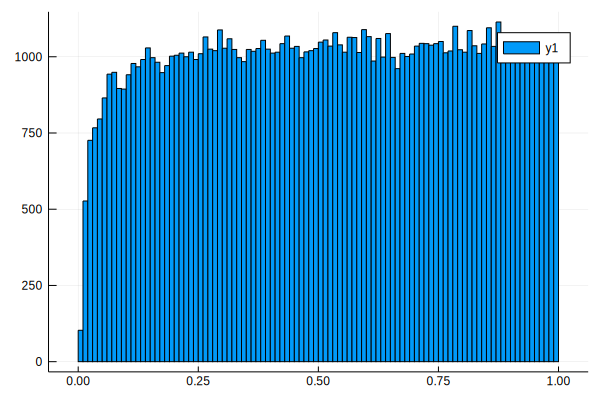

In [4]:
histogram(xorb1024_1e7_epsZero_,bins=100)

## 2nd  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-5$; $d = 2^{-7}$ 

In [5]:
#PARAMETERS
epsilon= BigFloat(0.00001)
iters = 100000
precision=1024
exponent=7
xorb1024_1e7_eps1em5= NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.5958273506990967089040088899888570736163223804027273639027737878081316433856796095492297003020278011574097022040147866241270208857852137151171643465013179229320355105462427835345218858339675531770854271298220891213274251130500184444623904202073166414912985234382373607025874695609375816741939273784751565845529
x[n] = 0.7078296342361694117108020123079370640907077718453647559013259711655150161233938495655927933339056744970604048442557162287259133566123876797677961038963201469322027714426266452699751246562891700010968111561980280235731686813732678151562211913129516710510691324593993977140302558930947805391372822926206745427445
length(preLE) = 99999
length(x) = 100000
preLE[n - 1] = 0.685304003098919416544048078967232986420908317764554238183185150896823529918407084110715157623991208870441160829651846903250421984476552414233670338572818370936267225932228647723290426228327564340191616581567757352759653143794705605930263937144031195710866312506938650861291267325295851708

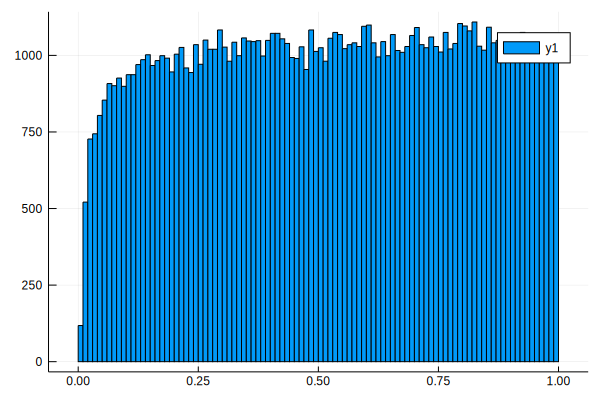

In [21]:
histogram(xorb1024_1e7_eps1em5,bins=100)

## 3rd  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-3$; $d = 2^{-7}$ 

In [7]:
#PARAMETERS
epsilon= BigFloat(0.001)
iters = 100000
precision=1024
exponent=7
xorb1024_1e7_eps1em3= NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.4254984197285653699872520883024804214762001581238631680065560581025219452554571854804431618482490268608531270106612137810294790530810944998876877813764241655300256813259325902588983398197511678354736633441224529487739271633992604934430330089643569918511437247050774768538052582689948752824969727742599953613836
x[n] = 0.3260108528481769611759773109842675530018151961671555320190402322052317275570845366820387227511835448979517663907519027653003884057856201649248900887967213171702872654054161757304028929591631135075192748921418724859539617844333734835500926796165987526955938320660212166734080370387930881191670852510944347736546
length(preLE) = 99999
length(x) = 100000
preLE[n - 1] = 0.685304003098919416544048078967232986420908317764554238183185150896823529918407084110715157623991208870441160829651846903250421984476552414233670338572818370936267225932228647723290426228327564340191616581567757352759653143794705605930263937144031195710866312506938650861291267325295851708

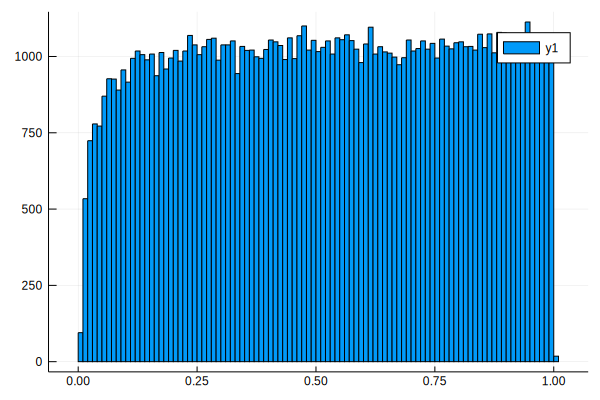

In [22]:
histogram(xorb1024_1e7_eps1em3,bins=100)

## 4th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-2$; $d = 2^{-7}$ 

In [9]:
#PARAMETERS
epsilon= BigFloat(0.01)
iters = 100000
precision=1024
exponent=7
xorb1024_1e7_eps1em2= NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.1016910447588259265133648785768029035374210598852978455485229152337474389618415544317699488045108956183286919242553460308055421510676673827334716585353134172353949893508553013617467254280570876993366782128021942780306351846639330901655381690866538084748943440780960024923475474866090582979159539186121792478564
x[n] = 0.9140414791648786194631902383559229742434042447767961019097077863575787714020937244361807417313442061433753133038042528124193433179463622967522658587766369455481349117234403005719911054312839999897972162131361121281571076964578280091961100908626968743359598819998063445455629860283956355683986018782769863253085
length(preLE) = 99999
length(x) = 100000
preLE[n - 1] = 0.685304003098919416544048078967232986420908317764554238183185150896823529918407084110715157623991208870441160829651846903250421984476552414233670338572818370936267225932228647723290426228327564340191616581567757352759653143794705605930263937144031195710866312506938650861291267325295851708

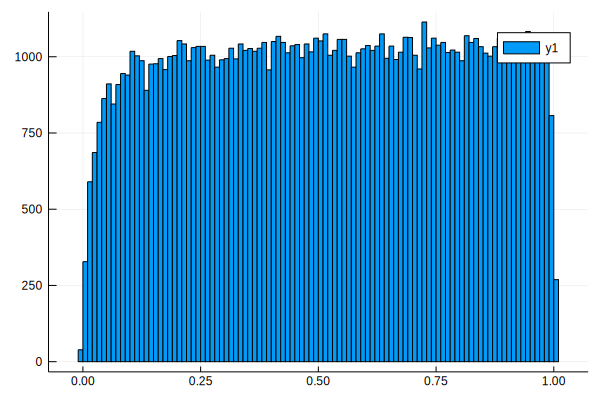

In [18]:
histogram(xorb1024_1e7_eps1em2,bins=100)

## 5th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.012$; $d = 2^{-7}$ 

In [11]:
#PARAMETERS
epsilon= BigFloat(0.012)
iters = 100000|
precision=1024
exponent=7
xorb1024_1e7_eps0p012= NICvlmlBig(epsilon,iters,exponent,precision);

ErrorException: syntax: "100000" is not a valid function argument name

In [17]:
histogram(xorb1024_1e7_eps0p012,bins=100)

UndefVarError: UndefVarError: xorb1024_1e7_eps0p012 not defined

## 6th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.015$; $d = 2^{-7}$ 

In [13]:
#PARAMETERS
epsilon= BigFloat(0.015)
iters = 100000
precision=1024
exponent=7
xorb1024_1e7_eps0p015= NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.4563061807617302706794097735533699200279752028367145697693658923389559764718156306729169539339239828898180081015751552371863015257743717010233696942255043343797756103955563577884155988801844002572201937759143239241374616530022919694856929815437483697767981413042156631875063498467908962538105584321906388936546
x[n] = 0.9111537419668901496926797420093375128319830311490461540892525164036379471212115951780467416915509229088221823268054055998715543375806702752958463185439440333533350563527467541039018582375780208127134804056441237939587993960715615694937454356392283310800362559701638889719069739240103940050316325933341298050995
length(preLE) = 99999
length(x) = 100000
preLE[n - 1] = 0.685304003098919416544048078967232986420908317764554238183185150896823529918407084110715157623991208870441160829651846903250421984476552414233670338572818370936267225932228647723290426228327564340191616581567757352759653143794705605930263937144031195710866312506938650861291267325295851708

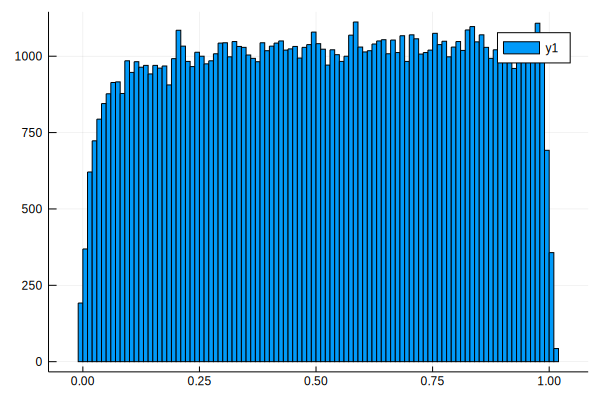

In [29]:
histogram(xorb1024_1e7_eps0p015,bins=100)

## 7th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.02$; $d = 2^{-7}$ 

In [55]:
#PARAMETERS
epsilon= BigFloat(0.02)
iters = 1000000
precision=1024
exponent=7
xorb1024_1e7_eps0p02 = NICvlmlBig(epsilon,iters,exponent,precision);

d = 0.0078125
x[1] = 0.8411164970504044299573950029791809471460146593965022473753329242334586556362542585443025429303472272002820689996377053082093310052958351345612044339848758554403260586329210666651319636913407259227345239576750762574145747456156144459218956642069818361822003712927215756480684845338635977396566789997154400455316
x[n] = 0.1373845553008096900500507563238411344546487284786280778157866863383779527856456334806631722939903878280358319882245210470114173732435795081873345177317375146318583849002842561858748479391778442564636573781926310870688825352507822401796626408464473560149391625887275149990948599741363092704936799499347898729628
length(preLE) = 999999
length(x) = 1000000
preLE[n - 1] = 0.6853040030989194165440480789672329864209083177645542381831851508968235299184070841107151576239912088704411608296518469032504219844765524142336703385728183709362672259322286477232904262283275643401916165815677573527596531437947056059302639371440311957108663125069386508612912673252958517

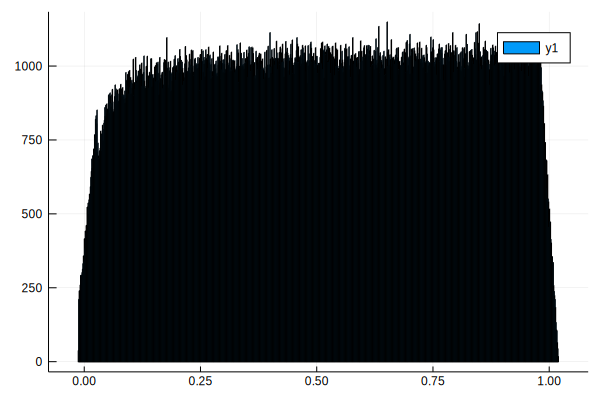

In [56]:
histogram(xorb1024_1e7_eps0p02,bins=1000)

# Observations regarding 1024 bits calculations above

## 1. There is not a considerable difference regarding the shape of the distributions compared to those obtained with floating point reals of 64 bits of precision. Please consult slides.

## 2. For noise level $\epsilon \lesssim 0.012 $ Lyapunov exponent values do not differ appreciably from those of 64 bits of precision.
## Nevertheless, for $\epsilon > 0.012 $, a considerable difference is appreciated in the Lyapunov exponent results:

| $\epsilon$      | $\lambda$ (1024) |   $\lambda$ (64)  |
|:---------------:|:----------------:|:------------------|
| 0.0000000000... | -4.8520302639... |  same             |
| 0.0000010000... | -4.8520302639... |  same             |
| 0.0010000000... | -4.8520302639... |  same             |
| 0.0100000000... | -3.7296126080... |  similar          |
| 0.0120000000... | -1.0318233531... |  similar          | 
| 0.0150000000... |  1.2935564269... |  $\simeq 0$       |
| 0.0200000000... |  3.6358488218... |  $\simeq 0.34$    |

# A plot of Lyapunov exponent, $\lambda$ vs. Noise level, $\epsilon$ with high precision, will be coming soon.

# Also coming soon, there will be the analysis of different models (some discussed after Trieste with Yuzuru) with the required precision. 